# <span style="color:rgb(160,0,86)">Zeitreihenanalyse</span>

***

## <span style="color:rgb(160,0,86)">Lernziele</span>

- Sie wissen was eine Zeitreihe ist.
- Für einfache Zeitreihen können Sie eine **Trendlinie** und eine **Saisonfigur** bestimmen.  
- Sie können Zeitreihen mit **gleitenden Mittelwerten** oder **exponentiell** glätten.  

***

### <span style="color:rgb(160,0,86)">Was ist eine Zeitreihe?</span>

Eine **Zeitreihe** ist eine Folge von **zeitlich hintereinander** erhobenen Beobachtungswerten eines Merkmals bei einer statisischen Einheit. Oft haben die Zeitwerte regelmässige Abstände.     

#### <span style="color:rgb(160,0,86)">Typische Beispiele:</span>

- Tägliche Schlusskurse eines börsengehandelten Wertpapiers.
- Die monatlich bestgestellt Arbeitslosenzahl in der Schweiz.
- Die Quartalsumsätze eines Unternehmens.
- Die jährliche Fördermenge einer Erdölraffinerie.
- Aktionen auf einem Computersystem in einer Logdatei
- Sensorwerte einer Traffic-Messungen. 

***

In der **Zeitreihenanalyse** werden Zeireihen auf Gesetzmässigkeiten untersucht, die sich aus der zeitlichen Abfolge der Beobachtungen ergeben. 

Die einfachsten Verfahren zielen darauf ab, den Zeitreihenverlauf auf systematische Komponenten wie **Trend** und **Saisoneinflüsse** zurückzuführen. Neben diesen systematischen Komponenten wird noch eine Restkomponente berücksichtigt, in der alle nicht systematischen zufälligen Einflüsse auf die Zeitreihe zusammengefasst werden.

Im **additiven Modell der Zeitreihe** wird also eine Schätzung wie folgt gemacht:
$$\pmb{\hat{y}(t)}\;=\;\textbf{glatte Komponente }\, \pmb{g(t)}\; + \;\textbf{zyklische Komponente }\, \pmb{s(t)}$$

### <span style="color:rgb(160,0,86)">Eine Zeitreihe zur Kohlendioxidkonzentration in der Atmosphäre.</span>

Die Messstation Mauna Loa ist eine meteorologische Forschungsstation in 3397 Metern Höhe auf dem Vulkan Mauna Loa auf Hawaii (https://gml.noaa.gov/ccgg/trends/data.html).

<p style="text-align: center"><img src="Bilder/MaunaLoa.png"></p>

Seit 1958 werden dort kontinuierlich $\mathsf{CO}_2$-Messungen durchgeführt, was das **Global Monitorin Laboratory** zu den längsten kontinuierlichen Zeitreihen der Welt macht:

In [1]:
#Mauna Loa CO2-Aufzeichnungen
import numpy as np
import pandas as pd

CO2 = pd.read_csv("Daten/co2_mm_mlo.csv", comment="#")

CO2.head(3)

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.71,314.44,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.69,-1,-9.99,-0.99


In [2]:
df = CO2[["year", "month", "decimal date", "average"]][CO2["year"] >= 1990]
df.head()

,year,month,decimal date,average
382,1990,1,1990.0417,353.86
383,1990,2,1990.1250,355.10
384,1990,3,1990.2083,355.75
385,1990,4,1990.2917,356.38
386,1990,5,1990.3750,357.38


<Axes: xlabel='decimal date', ylabel='average'>

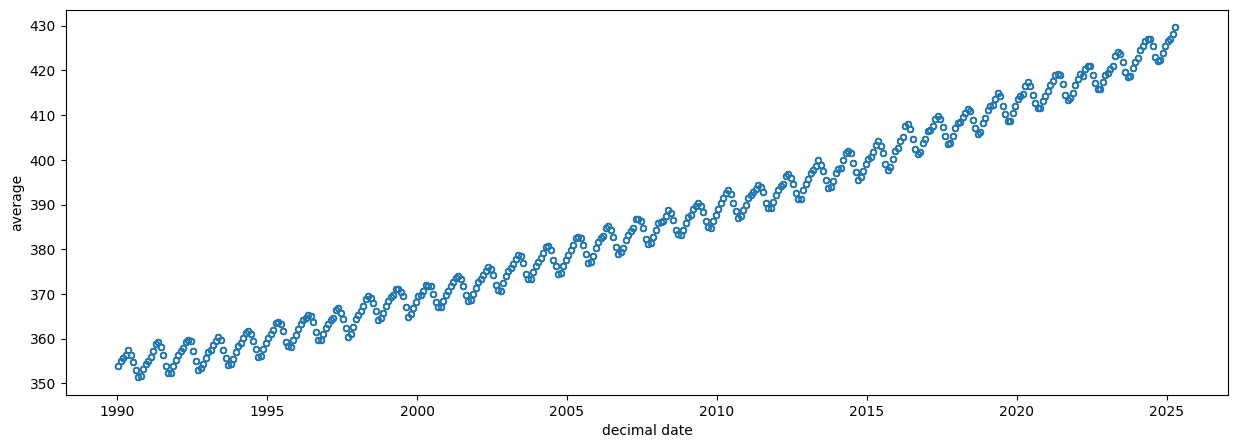

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)
df.plot.scatter(x="decimal date", y="average", ax=ax, marker="$\u25EF$")

<Axes: xlabel='decimal date'>

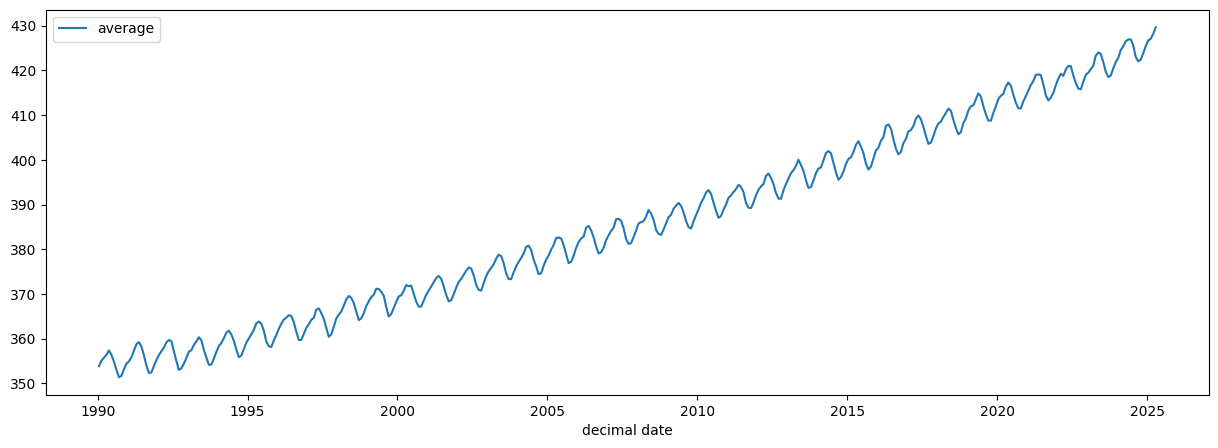

In [4]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)
df.plot(x="decimal date", y="average", ax=ax)

In [5]:
from scipy.optimize import minimize
def model(time,a,b,c):
    return a*(time**b) + c

t = df["decimal date"] - 1989

def RSS(coeffs):
    residuen = df["average"] - model(t,coeffs[0],coeffs[1],coeffs[2])
    return (residuen**2).sum()

fit = minimize(RSS,x0=np.array([0.1,3,350]),method='Nelder-Mead')
fit

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 2113.1079374868655
             x: [ 6.925e-01  1.296e+00  3.532e+02]
           nit: 217
          nfev: 379
 final_simplex: (array([[ 6.925e-01,  1.296e+00,  3.532e+02],
                       [ 6.925e-01,  1.296e+00,  3.532e+02],
                       [ 6.925e-01,  1.296e+00,  3.532e+02],
                       [ 6.925e-01,  1.296e+00,  3.532e+02]]), array([ 2.113e+03,  2.113e+03,  2.113e+03,  2.113e+03]))

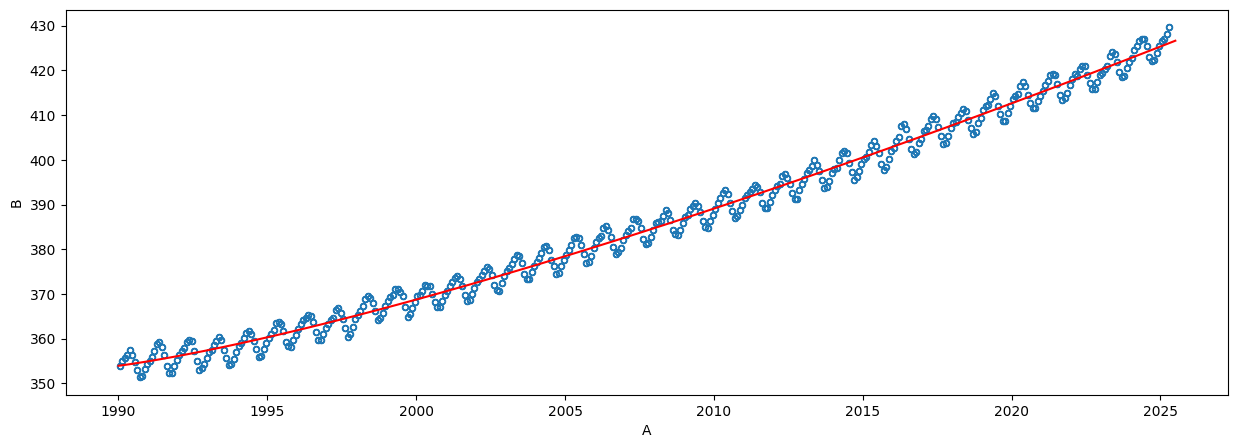

In [6]:
def predict(x):
    return model(x - 1989,fit.x[0],fit.x[1],fit.x[2])

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)
df.plot.scatter(x = "decimal date", y = "average", ax = ax, marker="$\u25EF$")
ax.set_xlabel("A")
ax.set_ylabel("B")

x = np.linspace(1990,2025.5,100)
y = predict(x)
ax.plot(x,y,color="red",lw=1.5)
plt.show()

In [7]:
df["residum"] = df["average"] - predict(df["decimal date"])
df.head()

,year,month,decimal date,average,residum
382,1990,1,1990.0417,353.86,-0.114096
383,1990,2,1990.1250,355.10,1.049340
384,1990,3,1990.2083,355.75,1.621075
385,1990,4,1990.2917,356.38,2.171098
386,1990,5,1990.3750,357.38,3.089675


In [8]:
means = [df["residum"][df["month"] == i].mean() for i in range(1, 13)]
df.shape[0]
mean_seasonal = ((df.shape[0] // 12 + 1) * means)[:df.shape[0]]
df["mean_seasonal"] = np.array(mean_seasonal)
df.head()

,year,month,decimal date,average,residum,mean_seasonal
382,1990,1,1990.0417,353.86,-0.114096,0.202553
383,1990,2,1990.1250,355.10,1.049340,0.866083
384,1990,3,1990.2083,355.75,1.621075,1.526486
385,1990,4,1990.2917,356.38,2.171098,2.706618
386,1990,5,1990.3750,357.38,3.089675,3.107244


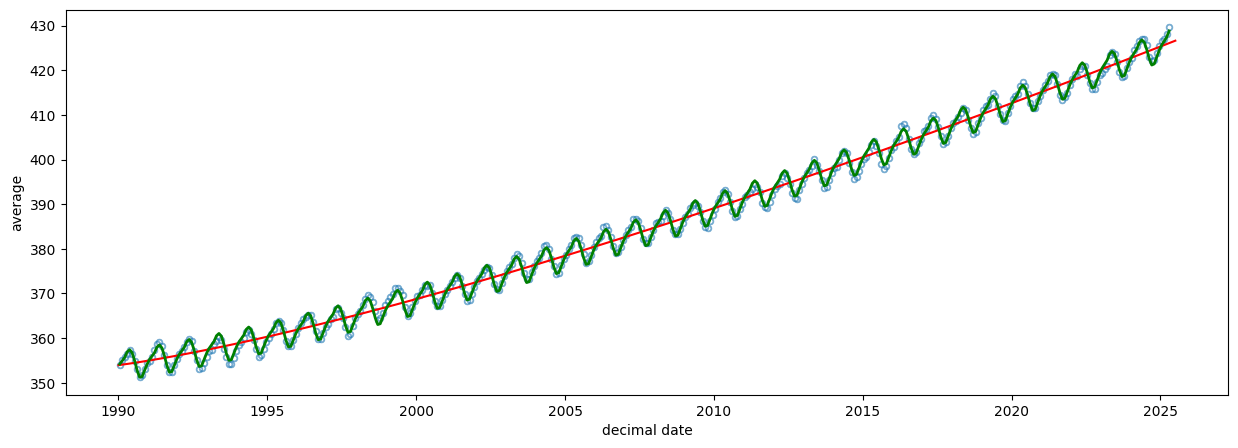

In [9]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)

df.plot.scatter(x = "decimal date", y = "average", ax = ax, marker="$\u25EF$",alpha=0.5)
x = np.linspace(1990,2025.5,100)
y = predict(x)
ax.plot(x,y,color="red",lw=1.5)
x_fit = df["decimal date"]
y_fit = predict(x_fit)+np.array(mean_seasonal)
ax.plot(x_fit,y_fit,color="green",lw=2)

plt.show()

In [10]:
R_squared_trend = predict(df["decimal date"]).var()/df["average"].var()
R_squared = (predict(df["decimal date"])+np.array(mean_seasonal)).var()/df["average"].var()
print(R_squared_trend,R_squared)

0.9892011109230247 0.9979682806136927


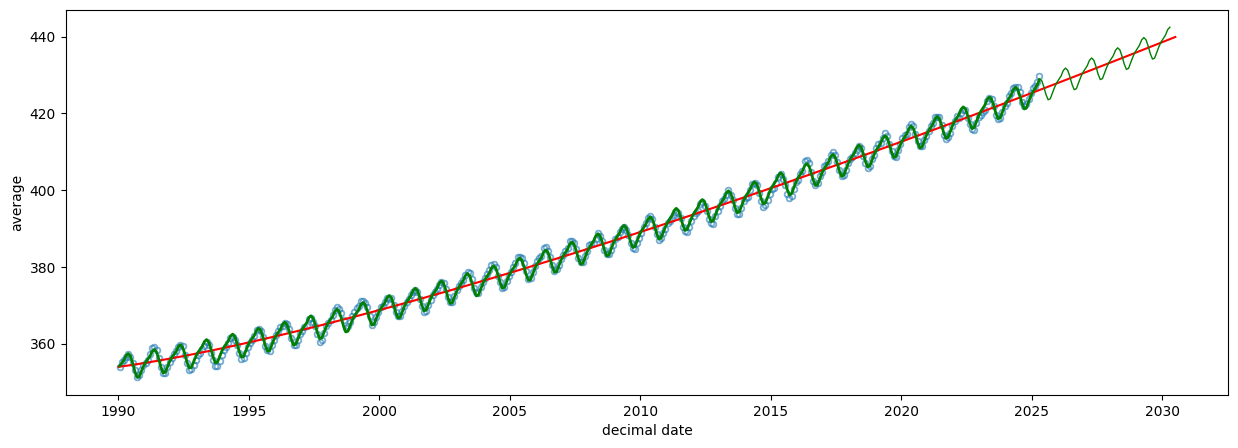

In [11]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)

df.plot.scatter(x = "decimal date", y = "average", ax = ax, marker="$\u25EF$",alpha=0.5)
x = np.linspace(1990,2030.5,100)
y = predict(x)
ax.plot(x,y,color="red",lw=1.5)
x_fit = df["decimal date"]
y_fit = predict(x_fit)+np.array(mean_seasonal)
ax.plot(x_fit,y_fit,color="green",lw=2)
x_pred = np.array(x_fit.iloc[df.shape[0]-60:df.shape[0]])+5
y_pred = predict(x_pred)+np.array(mean_seasonal)[5:65]
ax.plot(x_pred,y_pred,color="green",lw=1)

plt.show()

### <span style="color:rgb(160,0,86)">Was ist eine Glättung einer Zeitreihe?</span>

Eine einfache Methode der Glättung von historischen Zeitreihen besetzt darin, kurzefristige zufällige, saisonale oder auch konjunkturelle Schwankungen zu eliminieren, indem man die Zeitreihenwerte über mehrere, aufeinander folgende Perioden mit einem **gleitenden Durchschnitt** mittelt.
- Für eine **ungerade**  Periodenlänge $\pmb{L}$ ist der **gleitende zentrierte Durchschmitt**:
$$\pmb{\bar{y}_{(L)}}\;=\;\pmb{\frac{1}{L}\;\underbrace{\left(y_{t-\frac{L-1}{2}}+\ldots+y_t+\ldots + y_{t+\frac{L-1}{2}}\right)}_{L\text{ Werte}}}$$
- Für eine **gerade**  Periodenlänge $\pmb{L}$ ist der **gleitende zentrierte Durchschmitt**:
$$\pmb{\bar{y}_{(L)}}\;=\;\pmb{\frac{1}{L}\;\underbrace{\left(\textcolor{red}{\frac{1}{2}y_{t-\frac{L}{2}}}+y_{t-\frac{L}{2}+1}+\ldots + y_{t+\frac{L}{2}-1}+ \textcolor{red}{\frac{1}{2}y_{t+\frac{L}{2}}}\right)}_{L+1\text{ Werte}}}$$

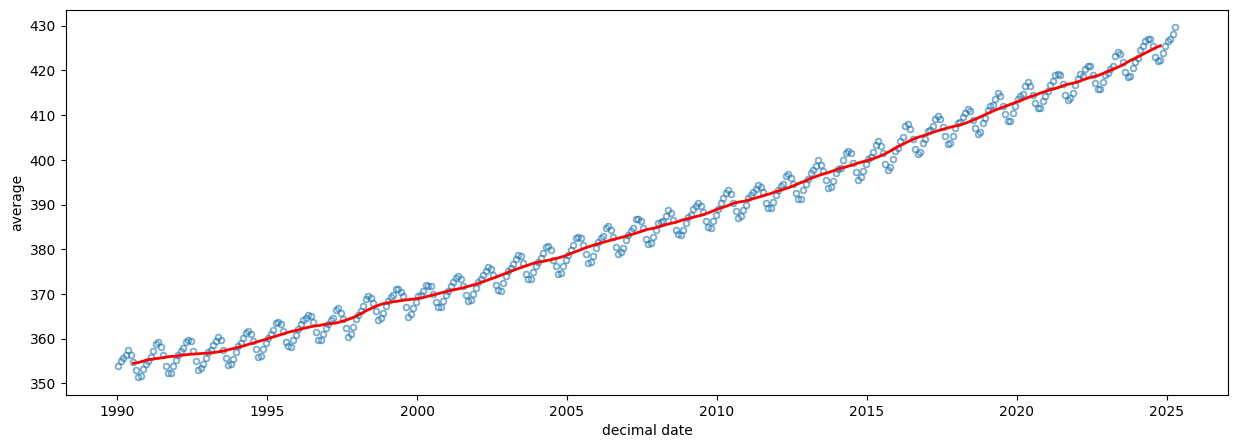

In [12]:
# Trendline mit Glättung -> ohne minimizer!
d = 12
smoothed_c = [1/d * (df["average"].iloc[i]/2 +
                      df["average"].iloc[i+1:i+d].sum() +
                      df["average"].iloc[i+d]/2)
              for i in range(0,df.shape[0]-d)]

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)

df.plot.scatter(x = "decimal date", y = "average", ax = ax, marker="$\u25EF$",alpha=0.5)
x_trend = df["decimal date"][:df.shape[0]-d] + 0.5
y_trend = np.array(smoothed_c)
ax.plot(x_trend,y_trend,color="red",lw=2)

plt.show()

Beim gleitenden Durchschnitt werden alle Werte der Periode $\pmb{L}$ gleich stark gewichtet. Bei der **exponentiellen Glättung** werden die aktuellen Werte stärker gewichtet als ältere Beobachtungen, die exponentiell weniger Einfluss haben. Die geglätteten Werte können *rekursiv* berechnet werden: $$\pmb{\bar{y}(t)} \;=\; \pmb{\alpha\cdot y_t + (1-\alpha)\cdot\bar{y}(t-1)}$$

Der Parameter $\pmb{\alpha}$ heisst **Glättungsfaktor**. 
- Für $\pmb{\alpha}=1$ ist der Vorhersagewert gleich dem Messwert (keine Glättung)
- Für $\pmb{\alpha}=0$ ist der Vorhersagewert unverändert (Glättung zu einer Parallelen zur $x$-Achse) 

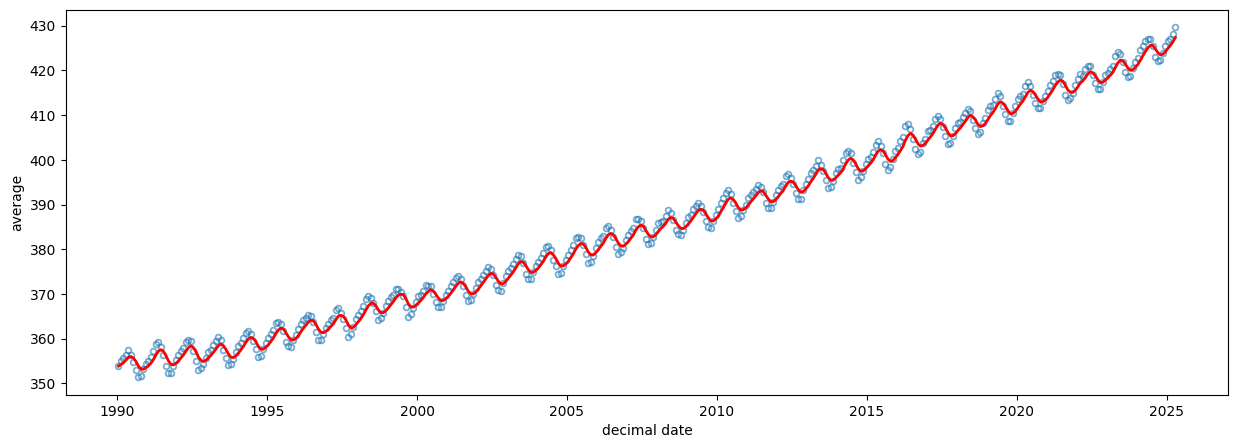

In [16]:
 # einfache exponentielle Glättung
y_smooth = [df["average"].iloc[0]]
alpha = 0.3
for i in range(1,df.shape[0]):
    y_smooth.append(alpha * df["average"].iloc[i] + (1-alpha)*y_smooth[i-1])

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,1,1)

df.plot.scatter(x = "decimal date", y = "average", ax = ax, marker="$\u25EF$",alpha=0.5)
x_trend = df["decimal date"]
y_trend = np.array(y_smooth)
ax.plot(x_trend,y_trend,color="red",lw=2)

plt.show()

### <span style="color:rgb(160,0,86)">Aufgabe 1</span>
Machen Sie eine **Zeitreihenanalyse** für die Anzahl Fluggäste pro Monat an Berliner Flughäfen (beobachtet von Januar 2011 bis Dezember 2017). Die Daten finden sie in der Datei *Fluggaeste.sav* im Ordner Daten.

In [ ]:
# To do!

![HSLU](Bilder/LogoHSLU.png)